In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [70]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
print(parent_dir)
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated_fixed")
features = ["score_difference", "type.id", "relative_strength", "home_has_possession", "end.down", "end.yardsToEndzone", "end.distance", "field_position_shift", "home_timeouts_left", "away_timeouts_left"]

/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML


In [71]:
# Reset the modules
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

import process_data
training_data = process_data.load_data(interpolated_dir, 
                                       years = [2016, 2017,2018, 2019, 2020, 2021, 2022], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win")

validation_data = process_data.load_data(interpolated_dir, 
                                       years = [2023], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = True
                                       )

test_data = process_data.load_data(interpolated_dir, 
                                       years = [2024],
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = False
                                       )


Loading data for 2022
  Processing 271 CSV files in parallel with 8 workers...
  Completed processing 2022
Loading data for 2024
skipping  2024
Loading data for 2023
skipping  2023
Loading data for .DS_Store
Loading data for 2017
  Processing 254 CSV files in parallel with 8 workers...
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2017/game_400951752.csv
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2017/game_400951752.csv
  Completed processing 2017
Loading data for 2019
  Processing 256 CSV files in parallel with 8 workers...
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2019/game_401127989.csv
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2019/game_401127963.csv
  NaN foun

In [72]:
# Get information about the data
training_data = dict(sorted(training_data.items()))
for timestep in training_data:
    print(f"timestep: {timestep}, number of instances: {len(training_data[timestep])}")

timestep: 0.0, number of instances: 3244
timestep: 0.005, number of instances: 1142
timestep: 0.01, number of instances: 2157
timestep: 0.015, number of instances: 1805
timestep: 0.02, number of instances: 2016
timestep: 0.025, number of instances: 2086
timestep: 0.03, number of instances: 1976
timestep: 0.035, number of instances: 2157
timestep: 0.04, number of instances: 2047
timestep: 0.045, number of instances: 2177
timestep: 0.05, number of instances: 2126
timestep: 0.055, number of instances: 2038
timestep: 0.06, number of instances: 2220
timestep: 0.065, number of instances: 2157
timestep: 0.07, number of instances: 2181
timestep: 0.075, number of instances: 2135
timestep: 0.08, number of instances: 2193
timestep: 0.085, number of instances: 2211
timestep: 0.09, number of instances: 2122
timestep: 0.095, number of instances: 2207
timestep: 0.1, number of instances: 2178
timestep: 0.105, number of instances: 2161
timestep: 0.11, number of instances: 2234
timestep: 0.115, number o

In [73]:
for timestep in test_data:
    print(f"timestep: {timestep}, number of instances: {len(test_data[timestep])}")

timestep: 0.0, number of instances: 343
timestep: 0.005, number of instances: 426
timestep: 0.01, number of instances: 373
timestep: 0.015, number of instances: 476
timestep: 0.02, number of instances: 378
timestep: 0.025, number of instances: 481
timestep: 0.03, number of instances: 418
timestep: 0.035, number of instances: 455
timestep: 0.04, number of instances: 476
timestep: 0.045, number of instances: 430
timestep: 0.05, number of instances: 468
timestep: 0.055, number of instances: 501
timestep: 0.06, number of instances: 466
timestep: 0.065, number of instances: 470
timestep: 0.07, number of instances: 459
timestep: 0.075, number of instances: 500
timestep: 0.08, number of instances: 477
timestep: 0.085, number of instances: 437
timestep: 0.09, number of instances: 522
timestep: 0.095, number of instances: 464
timestep: 0.1, number of instances: 503
timestep: 0.105, number of instances: 474
timestep: 0.11, number of instances: 477
timestep: 0.115, number of instances: 458
timest

In [110]:
other_features = [
            "type.id",             # Play type (categorical)
            "home_has_possession", # Binary indicator
            "end.down",            # Down number (1-4, discrete)
            "home_timeouts_left",  # Discrete count (0-3)
            "away_timeouts_left",  # Discrete count (0-3)
        ]
numeric_features = [
    "score_difference",
    "relative_strength", 
    "end.yardsToEndzone", 
    "end.distance", 
    "field_position_shift"
]

In [147]:
# Setup model for each timestep
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
# create an array of logistic regression models

modules_to_reload = [
    'models.logistic_regression',
    'models.Model'
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]
from models.Model import Model
from models.logistic_regression import setup_logistic_regression_models

models = setup_logistic_regression_models(training_data, validation_data, numeric_features, other_features, features, optimize_hyperparams=True, use_calibration=False)


Processing timestep: 0.0


Best trial: 21. Best value: 0.635932: 100%|██████████| 50/50 [00:04<00:00, 11.38it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 0.00% (Optimized): Training Loss = 0.6245, Accuracy = 0.6436, Test Loss = 0.6359, Test Accuracy = 0.6635
Processing timestep: 0.005


Best trial: 25. Best value: 0.682942: 100%|██████████| 50/50 [00:02<00:00, 21.77it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 0.50% (Optimized): Training Loss = 0.6468, Accuracy = 0.6401, Test Loss = 0.6829, Test Accuracy = 0.5323
Processing timestep: 0.01


Best trial: 31. Best value: 0.642701:  76%|███████▌  | 38/50 [00:05<00:00, 13.46it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 31. Best value: 0.642701: 100%|██████████| 50/50 [00:06<00:00,  7.85it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 1.00% (Optimized): Training Loss = 0.6193, Accuracy = 0.6430, Test Loss = 0.6427, Test Accuracy = 0.6269
Processing timestep: 0.015


Best trial: 31. Best value: 0.649183: 100%|██████████| 50/50 [00:37<00:00,  1.32it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 1.50% (Optimized): Training Loss = 0.6237, Accuracy = 0.6449, Test Loss = 0.6492, Test Accuracy = 0.6285
Processing timestep: 0.02


Best trial: 8. Best value: 0.671141:  38%|███▊      | 19/50 [00:02<00:03, 10.01it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 25. Best value: 0.670953: 100%|██████████| 50/50 [00:05<00:00,  8.60it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 2.00% (Optimized): Training Loss = 0.6339, Accuracy = 0.6448, Test Loss = 0.6710, Test Accuracy = 0.5813
Processing timestep: 0.025


Best trial: 32. Best value: 0.629979: 100%|██████████| 50/50 [00:04<00:00, 11.01it/s]


Timestep 2.50% (Optimized): Training Loss = 0.6329, Accuracy = 0.6352, Test Loss = 0.6300, Test Accuracy = 0.6487
Processing timestep: 0.03


Best trial: 49. Best value: 0.642564: 100%|██████████| 50/50 [00:06<00:00,  7.40it/s]


Timestep 3.00% (Optimized): Training Loss = 0.6238, Accuracy = 0.6457, Test Loss = 0.6426, Test Accuracy = 0.6541
Processing timestep: 0.035


Best trial: 25. Best value: 0.668949: 100%|██████████| 50/50 [00:05<00:00,  9.14it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 3.50% (Optimized): Training Loss = 0.6290, Accuracy = 0.6426, Test Loss = 0.6689, Test Accuracy = 0.5774
Processing timestep: 0.04


Best trial: 41. Best value: 0.669059: 100%|██████████| 50/50 [00:07<00:00,  6.48it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 4.00% (Optimized): Training Loss = 0.6265, Accuracy = 0.6468, Test Loss = 0.6691, Test Accuracy = 0.5987
Processing timestep: 0.045


Best trial: 41. Best value: 0.646232: 100%|██████████| 50/50 [00:05<00:00,  8.44it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 4.50% (Optimized): Training Loss = 0.6261, Accuracy = 0.6472, Test Loss = 0.6462, Test Accuracy = 0.6170
Processing timestep: 0.05


Best trial: 13. Best value: 0.633318: 100%|██████████| 50/50 [00:03<00:00, 13.00it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 5.00% (Optimized): Training Loss = 0.6211, Accuracy = 0.6533, Test Loss = 0.6333, Test Accuracy = 0.6540
Processing timestep: 0.055


Best trial: 26. Best value: 0.6351: 100%|██████████| 50/50 [00:03<00:00, 14.37it/s]  
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 5.50% (Optimized): Training Loss = 0.6141, Accuracy = 0.6658, Test Loss = 0.6351, Test Accuracy = 0.6348
Processing timestep: 0.06


Best trial: 0. Best value: 0.646126:  12%|█▏        | 6/50 [00:01<00:14,  3.06it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 17. Best value: 0.643641:  40%|████      | 20/50 [00:03<00:02, 13.60it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 17. Best value: 0.643641:  56%|█████▌    | 28/50 [00:04<00:01, 12.72it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 17. Best val

Timestep 6.00% (Optimized): Training Loss = 0.6190, Accuracy = 0.6514, Test Loss = 0.6436, Test Accuracy = 0.6601
Processing timestep: 0.065


Best trial: 27. Best value: 0.634902: 100%|██████████| 50/50 [00:04<00:00, 10.12it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 6.50% (Optimized): Training Loss = 0.6231, Accuracy = 0.6546, Test Loss = 0.6349, Test Accuracy = 0.6467
Processing timestep: 0.07


Best trial: 25. Best value: 0.642508: 100%|██████████| 50/50 [00:03<00:00, 15.05it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 7.00% (Optimized): Training Loss = 0.6135, Accuracy = 0.6657, Test Loss = 0.6425, Test Accuracy = 0.6023
Processing timestep: 0.075


Best trial: 1. Best value: 0.62338:  12%|█▏        | 6/50 [00:01<00:13,  3.27it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 1. Best value: 0.62338:  30%|███       | 15/50 [00:02<00:04,  8.42it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 16. Best value: 0.623375:  34%|███▍      | 17/50 [00:02<00:03,  8.84it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 16. Best value:

Timestep 7.50% (Optimized): Training Loss = 0.6179, Accuracy = 0.6576, Test Loss = 0.6233, Test Accuracy = 0.6347
Processing timestep: 0.08


Best trial: 31. Best value: 0.637634: 100%|██████████| 50/50 [00:11<00:00,  4.36it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 8.00% (Optimized): Training Loss = 0.6019, Accuracy = 0.6776, Test Loss = 0.6376, Test Accuracy = 0.6293
Processing timestep: 0.085


Best trial: 2. Best value: 0.610697:  12%|█▏        | 6/50 [00:02<00:20,  2.16it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 17. Best value: 0.610623:  48%|████▊     | 24/50 [00:07<00:08,  3.18it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 17. Best value: 0.610623:  70%|███████   | 35/50 [00:10<00:04,  3.68it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 17. Best val

Timestep 8.50% (Optimized): Training Loss = 0.6081, Accuracy = 0.6644, Test Loss = 0.6106, Test Accuracy = 0.6547
Processing timestep: 0.09


Best trial: 1. Best value: 0.624774:  12%|█▏        | 6/50 [00:01<00:15,  2.88it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 12. Best value: 0.624512:  36%|███▌      | 18/50 [00:03<00:04,  7.85it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 20. Best value: 0.624486:  56%|█████▌    | 28/50 [00:04<00:01, 13.47it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 20. Best val

Timestep 9.00% (Optimized): Training Loss = 0.6124, Accuracy = 0.6692, Test Loss = 0.6245, Test Accuracy = 0.6402
Processing timestep: 0.095


Best trial: 32. Best value: 0.593765: 100%|██████████| 50/50 [00:01<00:00, 27.35it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 9.50% (Optimized): Training Loss = 0.6093, Accuracy = 0.6602, Test Loss = 0.5938, Test Accuracy = 0.6535
Processing timestep: 0.1


Best trial: 12. Best value: 0.594812:  38%|███▊      | 19/50 [00:02<00:03,  8.69it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 24. Best value: 0.594811:  54%|█████▍    | 27/50 [00:03<00:01, 13.66it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 24. Best value: 0.594811:  92%|█████████▏| 46/50 [00:05<00:00, 10.34it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 24. Best v

Timestep 10.00% (Optimized): Training Loss = 0.6025, Accuracy = 0.6800, Test Loss = 0.5948, Test Accuracy = 0.6712
Processing timestep: 0.105


Best trial: 13. Best value: 0.611737:  36%|███▌      | 18/50 [00:02<00:03,  8.79it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 21. Best value: 0.611724: 100%|██████████| 50/50 [00:06<00:00,  7.83it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 10.50% (Optimized): Training Loss = 0.5991, Accuracy = 0.6798, Test Loss = 0.6117, Test Accuracy = 0.6486
Processing timestep: 0.11


Best trial: 42. Best value: 0.644688: 100%|██████████| 50/50 [00:02<00:00, 24.38it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 11.00% (Optimized): Training Loss = 0.6107, Accuracy = 0.6629, Test Loss = 0.6447, Test Accuracy = 0.6317
Processing timestep: 0.115


Best trial: 13. Best value: 0.597196:  36%|███▌      | 18/50 [00:02<00:02, 11.63it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 34. Best value: 0.59716: 100%|██████████| 50/50 [00:05<00:00,  9.22it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 11.50% (Optimized): Training Loss = 0.5917, Accuracy = 0.6772, Test Loss = 0.5972, Test Accuracy = 0.6713
Processing timestep: 0.12


Best trial: 42. Best value: 0.602585: 100%|██████████| 50/50 [00:05<00:00,  9.61it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 12.00% (Optimized): Training Loss = 0.6018, Accuracy = 0.6712, Test Loss = 0.6026, Test Accuracy = 0.6596
Processing timestep: 0.125


Best trial: 41. Best value: 0.64372: 100%|██████████| 50/50 [00:01<00:00, 35.13it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 12.50% (Optimized): Training Loss = 0.6011, Accuracy = 0.6811, Test Loss = 0.6437, Test Accuracy = 0.6306
Processing timestep: 0.13


Best trial: 14. Best value: 0.58966: 100%|██████████| 50/50 [00:07<00:00,  7.10it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 13.00% (Optimized): Training Loss = 0.5917, Accuracy = 0.6845, Test Loss = 0.5897, Test Accuracy = 0.6446
Processing timestep: 0.135


Best trial: 21. Best value: 0.621728: 100%|██████████| 50/50 [00:02<00:00, 20.82it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 13.50% (Optimized): Training Loss = 0.6038, Accuracy = 0.6662, Test Loss = 0.6217, Test Accuracy = 0.6218
Processing timestep: 0.14


Best trial: 14. Best value: 0.612736:  36%|███▌      | 18/50 [00:02<00:03,  9.61it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 34. Best value: 0.612628: 100%|██████████| 50/50 [00:10<00:00,  4.89it/s]


Timestep 14.00% (Optimized): Training Loss = 0.5922, Accuracy = 0.6914, Test Loss = 0.6126, Test Accuracy = 0.6721
Processing timestep: 0.145


Best trial: 32. Best value: 0.626233: 100%|██████████| 50/50 [00:02<00:00, 20.45it/s]


Timestep 14.50% (Optimized): Training Loss = 0.5931, Accuracy = 0.6750, Test Loss = 0.6262, Test Accuracy = 0.6540
Processing timestep: 0.15


Best trial: 33. Best value: 0.620959: 100%|██████████| 50/50 [00:02<00:00, 24.80it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 15.00% (Optimized): Training Loss = 0.5856, Accuracy = 0.6993, Test Loss = 0.6210, Test Accuracy = 0.6868
Processing timestep: 0.155


Best trial: 46. Best value: 0.566736: 100%|██████████| 50/50 [00:02<00:00, 21.29it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 15.50% (Optimized): Training Loss = 0.5877, Accuracy = 0.6851, Test Loss = 0.5667, Test Accuracy = 0.7030
Processing timestep: 0.16


Best trial: 33. Best value: 0.584464: 100%|██████████| 50/50 [00:03<00:00, 13.59it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 16.00% (Optimized): Training Loss = 0.5862, Accuracy = 0.6835, Test Loss = 0.5845, Test Accuracy = 0.6982
Processing timestep: 0.165


Best trial: 48. Best value: 0.616587: 100%|██████████| 50/50 [00:06<00:00,  8.19it/s]


Timestep 16.50% (Optimized): Training Loss = 0.5994, Accuracy = 0.6729, Test Loss = 0.6166, Test Accuracy = 0.6444
Processing timestep: 0.17


Best trial: 36. Best value: 0.612028: 100%|██████████| 50/50 [00:02<00:00, 16.70it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 17.00% (Optimized): Training Loss = 0.5902, Accuracy = 0.6834, Test Loss = 0.6120, Test Accuracy = 0.6598
Processing timestep: 0.175


Best trial: 42. Best value: 0.618499: 100%|██████████| 50/50 [00:02<00:00, 20.06it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 17.50% (Optimized): Training Loss = 0.5998, Accuracy = 0.6773, Test Loss = 0.6185, Test Accuracy = 0.6499
Processing timestep: 0.18


Best trial: 42. Best value: 0.582769: 100%|██████████| 50/50 [00:05<00:00,  8.90it/s]


Timestep 18.00% (Optimized): Training Loss = 0.5770, Accuracy = 0.6965, Test Loss = 0.5828, Test Accuracy = 0.6964
Processing timestep: 0.185


Best trial: 12. Best value: 0.583528: 100%|██████████| 50/50 [00:01<00:00, 25.36it/s]


Timestep 18.50% (Optimized): Training Loss = 0.5877, Accuracy = 0.6837, Test Loss = 0.5835, Test Accuracy = 0.7175
Processing timestep: 0.19


Best trial: 43. Best value: 0.603467: 100%|██████████| 50/50 [00:01<00:00, 25.96it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 19.00% (Optimized): Training Loss = 0.5798, Accuracy = 0.6936, Test Loss = 0.6035, Test Accuracy = 0.6817
Processing timestep: 0.195


Best trial: 46. Best value: 0.567796: 100%|██████████| 50/50 [00:05<00:00,  8.96it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 19.50% (Optimized): Training Loss = 0.5730, Accuracy = 0.6942, Test Loss = 0.5678, Test Accuracy = 0.7139
Processing timestep: 0.2


Best trial: 22. Best value: 0.583116: 100%|██████████| 50/50 [00:03<00:00, 14.38it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 20.00% (Optimized): Training Loss = 0.5820, Accuracy = 0.6938, Test Loss = 0.5831, Test Accuracy = 0.7201
Processing timestep: 0.205


Best trial: 21. Best value: 0.573814: 100%|██████████| 50/50 [00:02<00:00, 18.09it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 20.50% (Optimized): Training Loss = 0.5761, Accuracy = 0.6905, Test Loss = 0.5738, Test Accuracy = 0.7194
Processing timestep: 0.21


Best trial: 27. Best value: 0.584689: 100%|██████████| 50/50 [00:02<00:00, 23.84it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 21.00% (Optimized): Training Loss = 0.5727, Accuracy = 0.6999, Test Loss = 0.5847, Test Accuracy = 0.6832
Processing timestep: 0.215


Best trial: 29. Best value: 0.5771: 100%|██████████| 50/50 [00:01<00:00, 32.39it/s]  
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 21.50% (Optimized): Training Loss = 0.5795, Accuracy = 0.6968, Test Loss = 0.5771, Test Accuracy = 0.7194
Processing timestep: 0.22


Best trial: 13. Best value: 0.564995: 100%|██████████| 50/50 [00:02<00:00, 17.06it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 22.00% (Optimized): Training Loss = 0.5711, Accuracy = 0.7093, Test Loss = 0.5650, Test Accuracy = 0.6877
Processing timestep: 0.225


Best trial: 46. Best value: 0.557188: 100%|██████████| 50/50 [00:02<00:00, 20.53it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 22.50% (Optimized): Training Loss = 0.5618, Accuracy = 0.7106, Test Loss = 0.5572, Test Accuracy = 0.7021
Processing timestep: 0.23


Best trial: 25. Best value: 0.629171: 100%|██████████| 50/50 [00:02<00:00, 20.08it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 23.00% (Optimized): Training Loss = 0.5754, Accuracy = 0.7040, Test Loss = 0.6292, Test Accuracy = 0.6385
Processing timestep: 0.235


Best trial: 42. Best value: 0.539086: 100%|██████████| 50/50 [00:02<00:00, 24.42it/s]


Timestep 23.50% (Optimized): Training Loss = 0.5596, Accuracy = 0.7142, Test Loss = 0.5391, Test Accuracy = 0.7227
Processing timestep: 0.24


Best trial: 14. Best value: 0.564637: 100%|██████████| 50/50 [00:05<00:00,  9.71it/s]


Timestep 24.00% (Optimized): Training Loss = 0.5824, Accuracy = 0.6902, Test Loss = 0.5646, Test Accuracy = 0.7086
Processing timestep: 0.245


Best trial: 0. Best value: 0.581625: 100%|██████████| 50/50 [00:04<00:00, 11.30it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 24.50% (Optimized): Training Loss = 0.5703, Accuracy = 0.7042, Test Loss = 0.5816, Test Accuracy = 0.6791
Processing timestep: 0.25


Best trial: 23. Best value: 0.556308: 100%|██████████| 50/50 [00:05<00:00,  8.57it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 25.00% (Optimized): Training Loss = 0.5653, Accuracy = 0.7048, Test Loss = 0.5563, Test Accuracy = 0.7184
Processing timestep: 0.255


Best trial: 25. Best value: 0.660531: 100%|██████████| 50/50 [00:01<00:00, 33.66it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 25.50% (Optimized): Training Loss = 0.5778, Accuracy = 0.7118, Test Loss = 0.6605, Test Accuracy = 0.5792
Processing timestep: 0.26


Best trial: 32. Best value: 0.57674: 100%|██████████| 50/50 [00:06<00:00,  7.32it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 26.00% (Optimized): Training Loss = 0.5641, Accuracy = 0.7077, Test Loss = 0.5767, Test Accuracy = 0.6943
Processing timestep: 0.265


Best trial: 41. Best value: 0.589375: 100%|██████████| 50/50 [00:02<00:00, 21.60it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 26.50% (Optimized): Training Loss = 0.5651, Accuracy = 0.7039, Test Loss = 0.5894, Test Accuracy = 0.6744
Processing timestep: 0.27


Best trial: 43. Best value: 0.576442: 100%|██████████| 50/50 [00:02<00:00, 16.88it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 27.00% (Optimized): Training Loss = 0.5564, Accuracy = 0.7136, Test Loss = 0.5764, Test Accuracy = 0.6832
Processing timestep: 0.275


Best trial: 43. Best value: 0.561184: 100%|██████████| 50/50 [00:02<00:00, 23.97it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 27.50% (Optimized): Training Loss = 0.5617, Accuracy = 0.6976, Test Loss = 0.5612, Test Accuracy = 0.6961
Processing timestep: 0.28


Best trial: 48. Best value: 0.575773: 100%|██████████| 50/50 [00:01<00:00, 34.41it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 28.00% (Optimized): Training Loss = 0.5574, Accuracy = 0.7115, Test Loss = 0.5758, Test Accuracy = 0.6925
Processing timestep: 0.285


Best trial: 22. Best value: 0.533966: 100%|██████████| 50/50 [00:02<00:00, 17.25it/s]


Timestep 28.50% (Optimized): Training Loss = 0.5524, Accuracy = 0.7171, Test Loss = 0.5340, Test Accuracy = 0.7181
Processing timestep: 0.29


Best trial: 32. Best value: 0.581103: 100%|██████████| 50/50 [00:01<00:00, 36.03it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 29.00% (Optimized): Training Loss = 0.5606, Accuracy = 0.7049, Test Loss = 0.5811, Test Accuracy = 0.6474
Processing timestep: 0.295


Best trial: 20. Best value: 0.588351: 100%|██████████| 50/50 [00:03<00:00, 16.18it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 29.50% (Optimized): Training Loss = 0.5563, Accuracy = 0.7053, Test Loss = 0.5884, Test Accuracy = 0.6697
Processing timestep: 0.3


Best trial: 46. Best value: 0.557968: 100%|██████████| 50/50 [00:01<00:00, 30.77it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 30.00% (Optimized): Training Loss = 0.5539, Accuracy = 0.7085, Test Loss = 0.5580, Test Accuracy = 0.7108
Processing timestep: 0.305


Best trial: 32. Best value: 0.591181: 100%|██████████| 50/50 [00:01<00:00, 25.63it/s]


Timestep 30.50% (Optimized): Training Loss = 0.5548, Accuracy = 0.7043, Test Loss = 0.5912, Test Accuracy = 0.6799
Processing timestep: 0.31


Best trial: 20. Best value: 0.550597: 100%|██████████| 50/50 [00:04<00:00, 11.72it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 31.00% (Optimized): Training Loss = 0.5428, Accuracy = 0.7101, Test Loss = 0.5506, Test Accuracy = 0.7214
Processing timestep: 0.315


Best trial: 25. Best value: 0.567543: 100%|██████████| 50/50 [00:05<00:00,  9.07it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 31.50% (Optimized): Training Loss = 0.5671, Accuracy = 0.6975, Test Loss = 0.5675, Test Accuracy = 0.7116
Processing timestep: 0.32


Best trial: 41. Best value: 0.557654: 100%|██████████| 50/50 [00:10<00:00,  4.66it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 32.00% (Optimized): Training Loss = 0.5400, Accuracy = 0.7121, Test Loss = 0.5577, Test Accuracy = 0.6946
Processing timestep: 0.325


Best trial: 31. Best value: 0.58667: 100%|██████████| 50/50 [00:02<00:00, 19.30it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 32.50% (Optimized): Training Loss = 0.5502, Accuracy = 0.7268, Test Loss = 0.5867, Test Accuracy = 0.6787
Processing timestep: 0.33


Best trial: 24. Best value: 0.552764: 100%|██████████| 50/50 [00:01<00:00, 28.16it/s]


Timestep 33.00% (Optimized): Training Loss = 0.5504, Accuracy = 0.7217, Test Loss = 0.5528, Test Accuracy = 0.7139
Processing timestep: 0.335


Best trial: 41. Best value: 0.527781: 100%|██████████| 50/50 [00:05<00:00,  9.02it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 33.50% (Optimized): Training Loss = 0.5311, Accuracy = 0.7321, Test Loss = 0.5278, Test Accuracy = 0.7187
Processing timestep: 0.34


Best trial: 21. Best value: 0.514058: 100%|██████████| 50/50 [00:02<00:00, 20.01it/s]


Timestep 34.00% (Optimized): Training Loss = 0.5347, Accuracy = 0.7267, Test Loss = 0.5141, Test Accuracy = 0.7439
Processing timestep: 0.345


Best trial: 42. Best value: 0.540421: 100%|██████████| 50/50 [00:02<00:00, 16.74it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 34.50% (Optimized): Training Loss = 0.5324, Accuracy = 0.7324, Test Loss = 0.5404, Test Accuracy = 0.7134
Processing timestep: 0.35


Best trial: 41. Best value: 0.558447: 100%|██████████| 50/50 [00:01<00:00, 35.99it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 35.00% (Optimized): Training Loss = 0.5414, Accuracy = 0.7185, Test Loss = 0.5584, Test Accuracy = 0.7003
Processing timestep: 0.355


Best trial: 44. Best value: 0.543189: 100%|██████████| 50/50 [00:01<00:00, 25.88it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 35.50% (Optimized): Training Loss = 0.5362, Accuracy = 0.7187, Test Loss = 0.5432, Test Accuracy = 0.7341
Processing timestep: 0.36


Best trial: 45. Best value: 0.539986: 100%|██████████| 50/50 [00:01<00:00, 27.50it/s]


Timestep 36.00% (Optimized): Training Loss = 0.5474, Accuracy = 0.7227, Test Loss = 0.5400, Test Accuracy = 0.7159
Processing timestep: 0.365


Best trial: 41. Best value: 0.562539: 100%|██████████| 50/50 [00:01<00:00, 27.11it/s]


Timestep 36.50% (Optimized): Training Loss = 0.5299, Accuracy = 0.7394, Test Loss = 0.5625, Test Accuracy = 0.7072
Processing timestep: 0.37


Best trial: 47. Best value: 0.579981: 100%|██████████| 50/50 [00:02<00:00, 23.12it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 37.00% (Optimized): Training Loss = 0.5470, Accuracy = 0.7274, Test Loss = 0.5800, Test Accuracy = 0.7018
Processing timestep: 0.375


Best trial: 34. Best value: 0.552579: 100%|██████████| 50/50 [00:02<00:00, 23.48it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 37.50% (Optimized): Training Loss = 0.5250, Accuracy = 0.7290, Test Loss = 0.5526, Test Accuracy = 0.7385
Processing timestep: 0.38


Best trial: 41. Best value: 0.517832: 100%|██████████| 50/50 [00:02<00:00, 21.70it/s]


Timestep 38.00% (Optimized): Training Loss = 0.5186, Accuracy = 0.7362, Test Loss = 0.5178, Test Accuracy = 0.7520
Processing timestep: 0.385


Best trial: 23. Best value: 0.549083: 100%|██████████| 50/50 [00:02<00:00, 18.53it/s]


Timestep 38.50% (Optimized): Training Loss = 0.5379, Accuracy = 0.7207, Test Loss = 0.5491, Test Accuracy = 0.7233
Processing timestep: 0.39


Best trial: 42. Best value: 0.54092: 100%|██████████| 50/50 [00:08<00:00,  5.57it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 39.00% (Optimized): Training Loss = 0.5255, Accuracy = 0.7274, Test Loss = 0.5409, Test Accuracy = 0.7346
Processing timestep: 0.395


Best trial: 41. Best value: 0.55105: 100%|██████████| 50/50 [00:01<00:00, 34.83it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 39.50% (Optimized): Training Loss = 0.5332, Accuracy = 0.7263, Test Loss = 0.5510, Test Accuracy = 0.7454
Processing timestep: 0.4


Best trial: 47. Best value: 0.53475: 100%|██████████| 50/50 [00:02<00:00, 17.70it/s] 


Timestep 40.00% (Optimized): Training Loss = 0.5355, Accuracy = 0.7251, Test Loss = 0.5347, Test Accuracy = 0.7465
Processing timestep: 0.405


Best trial: 22. Best value: 0.532184: 100%|██████████| 50/50 [00:02<00:00, 21.30it/s]


Timestep 40.50% (Optimized): Training Loss = 0.5114, Accuracy = 0.7548, Test Loss = 0.5322, Test Accuracy = 0.7447
Processing timestep: 0.41


Best trial: 41. Best value: 0.57993: 100%|██████████| 50/50 [00:01<00:00, 25.43it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 41.00% (Optimized): Training Loss = 0.5408, Accuracy = 0.7273, Test Loss = 0.5799, Test Accuracy = 0.7017
Processing timestep: 0.415


Best trial: 21. Best value: 0.542211: 100%|██████████| 50/50 [00:11<00:00,  4.41it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 41.50% (Optimized): Training Loss = 0.5201, Accuracy = 0.7373, Test Loss = 0.5422, Test Accuracy = 0.7386
Processing timestep: 0.42


Best trial: 35. Best value: 0.576946: 100%|██████████| 50/50 [00:02<00:00, 20.72it/s]


Timestep 42.00% (Optimized): Training Loss = 0.5377, Accuracy = 0.7244, Test Loss = 0.5769, Test Accuracy = 0.7155
Processing timestep: 0.425


Best trial: 43. Best value: 0.564881: 100%|██████████| 50/50 [00:01<00:00, 31.98it/s]


Timestep 42.50% (Optimized): Training Loss = 0.5189, Accuracy = 0.7434, Test Loss = 0.5649, Test Accuracy = 0.7480
Processing timestep: 0.43


Best trial: 14. Best value: 0.551377: 100%|██████████| 50/50 [00:02<00:00, 21.51it/s]


Timestep 43.00% (Optimized): Training Loss = 0.5073, Accuracy = 0.7512, Test Loss = 0.5514, Test Accuracy = 0.7399
Processing timestep: 0.435


Best trial: 47. Best value: 0.514045: 100%|██████████| 50/50 [00:02<00:00, 19.44it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 43.50% (Optimized): Training Loss = 0.5124, Accuracy = 0.7486, Test Loss = 0.5140, Test Accuracy = 0.7670
Processing timestep: 0.44


Best trial: 43. Best value: 0.499374: 100%|██████████| 50/50 [00:02<00:00, 18.01it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 44.00% (Optimized): Training Loss = 0.5117, Accuracy = 0.7416, Test Loss = 0.4994, Test Accuracy = 0.7720
Processing timestep: 0.445


Best trial: 33. Best value: 0.572576: 100%|██████████| 50/50 [00:02<00:00, 19.48it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 44.50% (Optimized): Training Loss = 0.5123, Accuracy = 0.7447, Test Loss = 0.5726, Test Accuracy = 0.7229
Processing timestep: 0.45


Best trial: 41. Best value: 0.513948: 100%|██████████| 50/50 [00:01<00:00, 25.13it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 45.00% (Optimized): Training Loss = 0.5105, Accuracy = 0.7481, Test Loss = 0.5139, Test Accuracy = 0.7337
Processing timestep: 0.455


Best trial: 46. Best value: 0.516235: 100%|██████████| 50/50 [00:01<00:00, 27.62it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 45.50% (Optimized): Training Loss = 0.5234, Accuracy = 0.7352, Test Loss = 0.5162, Test Accuracy = 0.7536
Processing timestep: 0.46


Best trial: 20. Best value: 0.50612: 100%|██████████| 50/50 [00:01<00:00, 38.22it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 46.00% (Optimized): Training Loss = 0.5014, Accuracy = 0.7622, Test Loss = 0.5061, Test Accuracy = 0.7811
Processing timestep: 0.465


Best trial: 48. Best value: 0.517558: 100%|██████████| 50/50 [00:03<00:00, 14.95it/s]


Timestep 46.50% (Optimized): Training Loss = 0.4851, Accuracy = 0.7689, Test Loss = 0.5176, Test Accuracy = 0.7621
Processing timestep: 0.47


Best trial: 12. Best value: 0.533745: 100%|██████████| 50/50 [00:05<00:00,  9.45it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 47.00% (Optimized): Training Loss = 0.4970, Accuracy = 0.7616, Test Loss = 0.5337, Test Accuracy = 0.7286
Processing timestep: 0.475


Best trial: 41. Best value: 0.530635: 100%|██████████| 50/50 [00:02<00:00, 20.77it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 47.50% (Optimized): Training Loss = 0.4822, Accuracy = 0.7700, Test Loss = 0.5306, Test Accuracy = 0.7140
Processing timestep: 0.48


Best trial: 43. Best value: 0.507876: 100%|██████████| 50/50 [00:02<00:00, 20.59it/s]


Timestep 48.00% (Optimized): Training Loss = 0.4790, Accuracy = 0.7692, Test Loss = 0.5079, Test Accuracy = 0.7524
Processing timestep: 0.485


Best trial: 49. Best value: 0.498383: 100%|██████████| 50/50 [00:02<00:00, 23.36it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 48.50% (Optimized): Training Loss = 0.4772, Accuracy = 0.7697, Test Loss = 0.4984, Test Accuracy = 0.7381
Processing timestep: 0.49


Best trial: 48. Best value: 0.509441: 100%|██████████| 50/50 [00:03<00:00, 14.66it/s]


Timestep 49.00% (Optimized): Training Loss = 0.4787, Accuracy = 0.7804, Test Loss = 0.5094, Test Accuracy = 0.7469
Processing timestep: 0.495


Best trial: 38. Best value: 0.498674: 100%|██████████| 50/50 [00:02<00:00, 18.59it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 49.50% (Optimized): Training Loss = 0.4693, Accuracy = 0.7892, Test Loss = 0.4987, Test Accuracy = 0.7393
Processing timestep: 0.5


Best trial: 34. Best value: 0.485538: 100%|██████████| 50/50 [00:06<00:00,  8.02it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 50.00% (Optimized): Training Loss = 0.4631, Accuracy = 0.7813, Test Loss = 0.4855, Test Accuracy = 0.7747
Processing timestep: 0.505


Best trial: 48. Best value: 0.474631: 100%|██████████| 50/50 [00:02<00:00, 19.48it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 50.50% (Optimized): Training Loss = 0.4525, Accuracy = 0.7923, Test Loss = 0.4746, Test Accuracy = 0.7597
Processing timestep: 0.51


Best trial: 0. Best value: 0.452749:  12%|█▏        | 6/50 [00:01<00:10,  4.09it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 41. Best value: 0.449408: 100%|██████████| 50/50 [00:05<00:00,  9.41it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 51.00% (Optimized): Training Loss = 0.4549, Accuracy = 0.7825, Test Loss = 0.4494, Test Accuracy = 0.8114
Processing timestep: 0.515


Best trial: 30. Best value: 0.48892: 100%|██████████| 50/50 [00:03<00:00, 16.25it/s] 


Timestep 51.50% (Optimized): Training Loss = 0.4614, Accuracy = 0.7902, Test Loss = 0.4889, Test Accuracy = 0.7715
Processing timestep: 0.52


Best trial: 25. Best value: 0.496519:  72%|███████▏  | 36/50 [00:04<00:01, 10.60it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 25. Best value: 0.496519: 100%|██████████| 50/50 [00:05<00:00,  9.08it/s]


Timestep 52.00% (Optimized): Training Loss = 0.4620, Accuracy = 0.7813, Test Loss = 0.4965, Test Accuracy = 0.7429
Processing timestep: 0.525


Best trial: 22. Best value: 0.482779: 100%|██████████| 50/50 [00:04<00:00, 11.77it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 52.50% (Optimized): Training Loss = 0.4414, Accuracy = 0.8021, Test Loss = 0.4828, Test Accuracy = 0.7656
Processing timestep: 0.53


Best trial: 9. Best value: 0.460878:  68%|██████▊   | 34/50 [00:07<00:04,  3.95it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 9. Best value: 0.460878: 100%|██████████| 50/50 [00:11<00:00,  4.37it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 53.00% (Optimized): Training Loss = 0.4651, Accuracy = 0.7807, Test Loss = 0.4609, Test Accuracy = 0.7757
Processing timestep: 0.535


Best trial: 43. Best value: 0.464087: 100%|██████████| 50/50 [00:14<00:00,  3.57it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 53.50% (Optimized): Training Loss = 0.4277, Accuracy = 0.8083, Test Loss = 0.4641, Test Accuracy = 0.7761
Processing timestep: 0.54


Best trial: 41. Best value: 0.47664: 100%|██████████| 50/50 [00:02<00:00, 19.41it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 54.00% (Optimized): Training Loss = 0.4592, Accuracy = 0.7866, Test Loss = 0.4766, Test Accuracy = 0.7697
Processing timestep: 0.545


Best trial: 45. Best value: 0.486962: 100%|██████████| 50/50 [00:06<00:00,  7.22it/s]


Timestep 54.50% (Optimized): Training Loss = 0.4678, Accuracy = 0.7824, Test Loss = 0.4870, Test Accuracy = 0.7706
Processing timestep: 0.55


Best trial: 41. Best value: 0.476425: 100%|██████████| 50/50 [00:02<00:00, 19.59it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 55.00% (Optimized): Training Loss = 0.4395, Accuracy = 0.7971, Test Loss = 0.4764, Test Accuracy = 0.7702
Processing timestep: 0.555


Best trial: 35. Best value: 0.451333: 100%|██████████| 50/50 [00:03<00:00, 15.48it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 55.50% (Optimized): Training Loss = 0.4576, Accuracy = 0.7828, Test Loss = 0.4513, Test Accuracy = 0.8023
Processing timestep: 0.56


Best trial: 31. Best value: 0.407554: 100%|██████████| 50/50 [00:03<00:00, 13.11it/s]


Timestep 56.00% (Optimized): Training Loss = 0.4366, Accuracy = 0.8020, Test Loss = 0.4076, Test Accuracy = 0.8272
Processing timestep: 0.565


Best trial: 47. Best value: 0.449531: 100%|██████████| 50/50 [00:02<00:00, 23.11it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 56.50% (Optimized): Training Loss = 0.4368, Accuracy = 0.7911, Test Loss = 0.4495, Test Accuracy = 0.7950
Processing timestep: 0.57


Best trial: 22. Best value: 0.443878: 100%|██████████| 50/50 [00:06<00:00,  7.87it/s]


Timestep 57.00% (Optimized): Training Loss = 0.4501, Accuracy = 0.7905, Test Loss = 0.4439, Test Accuracy = 0.7715
Processing timestep: 0.575


Best trial: 35. Best value: 0.482508: 100%|██████████| 50/50 [00:02<00:00, 23.75it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 57.50% (Optimized): Training Loss = 0.4589, Accuracy = 0.7867, Test Loss = 0.4825, Test Accuracy = 0.7375
Processing timestep: 0.58


Best trial: 14. Best value: 0.464049: 100%|██████████| 50/50 [00:03<00:00, 16.55it/s]


Timestep 58.00% (Optimized): Training Loss = 0.4386, Accuracy = 0.7901, Test Loss = 0.4640, Test Accuracy = 0.7787
Processing timestep: 0.585


Best trial: 35. Best value: 0.470962: 100%|██████████| 50/50 [00:08<00:00,  6.17it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 58.50% (Optimized): Training Loss = 0.4355, Accuracy = 0.7994, Test Loss = 0.4710, Test Accuracy = 0.7618
Processing timestep: 0.59


Best trial: 33. Best value: 0.473342: 100%|██████████| 50/50 [00:02<00:00, 19.68it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 59.00% (Optimized): Training Loss = 0.4634, Accuracy = 0.7890, Test Loss = 0.4733, Test Accuracy = 0.7668
Processing timestep: 0.595


Best trial: 34. Best value: 0.426919: 100%|██████████| 50/50 [00:02<00:00, 17.74it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 59.50% (Optimized): Training Loss = 0.4337, Accuracy = 0.7954, Test Loss = 0.4269, Test Accuracy = 0.7623
Processing timestep: 0.6


Best trial: 46. Best value: 0.507738: 100%|██████████| 50/50 [00:02<00:00, 21.37it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 60.00% (Optimized): Training Loss = 0.4445, Accuracy = 0.7887, Test Loss = 0.5077, Test Accuracy = 0.7507
Processing timestep: 0.605


Best trial: 26. Best value: 0.468331: 100%|██████████| 50/50 [00:02<00:00, 18.15it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 60.50% (Optimized): Training Loss = 0.4354, Accuracy = 0.7871, Test Loss = 0.4683, Test Accuracy = 0.7832
Processing timestep: 0.61


Best trial: 44. Best value: 0.423644: 100%|██████████| 50/50 [00:08<00:00,  6.02it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 61.00% (Optimized): Training Loss = 0.4338, Accuracy = 0.7965, Test Loss = 0.4236, Test Accuracy = 0.7606
Processing timestep: 0.615


Best trial: 24. Best value: 0.451893: 100%|██████████| 50/50 [00:02<00:00, 19.46it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 61.50% (Optimized): Training Loss = 0.4224, Accuracy = 0.7968, Test Loss = 0.4519, Test Accuracy = 0.7571
Processing timestep: 0.62


Best trial: 32. Best value: 0.458616: 100%|██████████| 50/50 [00:14<00:00,  3.45it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 62.00% (Optimized): Training Loss = 0.4364, Accuracy = 0.7985, Test Loss = 0.4586, Test Accuracy = 0.7754
Processing timestep: 0.625


Best trial: 24. Best value: 0.409232: 100%|██████████| 50/50 [00:03<00:00, 15.55it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 62.50% (Optimized): Training Loss = 0.4339, Accuracy = 0.8067, Test Loss = 0.4092, Test Accuracy = 0.7966
Processing timestep: 0.63


Best trial: 46. Best value: 0.405873: 100%|██████████| 50/50 [00:02<00:00, 22.89it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 63.00% (Optimized): Training Loss = 0.4198, Accuracy = 0.8001, Test Loss = 0.4059, Test Accuracy = 0.8104
Processing timestep: 0.635


Best trial: 44. Best value: 0.484135: 100%|██████████| 50/50 [00:15<00:00,  3.26it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 63.50% (Optimized): Training Loss = 0.4226, Accuracy = 0.8021, Test Loss = 0.4841, Test Accuracy = 0.7536
Processing timestep: 0.64


Best trial: 26. Best value: 0.433871: 100%|██████████| 50/50 [00:02<00:00, 21.15it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 64.00% (Optimized): Training Loss = 0.4221, Accuracy = 0.8074, Test Loss = 0.4339, Test Accuracy = 0.8031
Processing timestep: 0.645


Best trial: 12. Best value: 0.447799: 100%|██████████| 50/50 [00:16<00:00,  3.11it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 64.50% (Optimized): Training Loss = 0.4379, Accuracy = 0.7953, Test Loss = 0.4478, Test Accuracy = 0.7834
Processing timestep: 0.65


Best trial: 32. Best value: 0.435806: 100%|██████████| 50/50 [00:08<00:00,  5.85it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 65.00% (Optimized): Training Loss = 0.4270, Accuracy = 0.7947, Test Loss = 0.4358, Test Accuracy = 0.7919
Processing timestep: 0.655


Best trial: 43. Best value: 0.442132: 100%|██████████| 50/50 [00:02<00:00, 20.21it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 65.50% (Optimized): Training Loss = 0.4088, Accuracy = 0.8111, Test Loss = 0.4421, Test Accuracy = 0.7898
Processing timestep: 0.66


Best trial: 45. Best value: 0.44761: 100%|██████████| 50/50 [00:04<00:00, 10.98it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 66.00% (Optimized): Training Loss = 0.4139, Accuracy = 0.8140, Test Loss = 0.4476, Test Accuracy = 0.7771
Processing timestep: 0.665


Best trial: 34. Best value: 0.393537: 100%|██████████| 50/50 [00:05<00:00,  9.82it/s]


Timestep 66.50% (Optimized): Training Loss = 0.3992, Accuracy = 0.8126, Test Loss = 0.3935, Test Accuracy = 0.8113
Processing timestep: 0.67


Best trial: 14. Best value: 0.429657: 100%|██████████| 50/50 [00:08<00:00,  5.82it/s]


Timestep 67.00% (Optimized): Training Loss = 0.4081, Accuracy = 0.8178, Test Loss = 0.4297, Test Accuracy = 0.8147
Processing timestep: 0.675


Best trial: 24. Best value: 0.49063: 100%|██████████| 50/50 [00:01<00:00, 26.17it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 67.50% (Optimized): Training Loss = 0.4270, Accuracy = 0.8052, Test Loss = 0.4906, Test Accuracy = 0.7410
Processing timestep: 0.68


Best trial: 27. Best value: 0.470352: 100%|██████████| 50/50 [00:01<00:00, 27.60it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 68.00% (Optimized): Training Loss = 0.4147, Accuracy = 0.8028, Test Loss = 0.4704, Test Accuracy = 0.7765
Processing timestep: 0.685


Best trial: 43. Best value: 0.405067: 100%|██████████| 50/50 [00:14<00:00,  3.35it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 68.50% (Optimized): Training Loss = 0.4044, Accuracy = 0.8110, Test Loss = 0.4051, Test Accuracy = 0.7917
Processing timestep: 0.69


Best trial: 22. Best value: 0.396743: 100%|██████████| 50/50 [00:14<00:00,  3.49it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 69.00% (Optimized): Training Loss = 0.3979, Accuracy = 0.8176, Test Loss = 0.3967, Test Accuracy = 0.8129
Processing timestep: 0.695


Best trial: 22. Best value: 0.420204: 100%|██████████| 50/50 [00:08<00:00,  6.07it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 69.50% (Optimized): Training Loss = 0.3884, Accuracy = 0.8183, Test Loss = 0.4202, Test Accuracy = 0.8118
Processing timestep: 0.7


Best trial: 21. Best value: 0.436042: 100%|██████████| 50/50 [00:12<00:00,  3.91it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 70.00% (Optimized): Training Loss = 0.3936, Accuracy = 0.8170, Test Loss = 0.4360, Test Accuracy = 0.7806
Processing timestep: 0.705


Best trial: 36. Best value: 0.400566: 100%|██████████| 50/50 [00:10<00:00,  4.58it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 70.50% (Optimized): Training Loss = 0.3924, Accuracy = 0.8181, Test Loss = 0.4006, Test Accuracy = 0.8230
Processing timestep: 0.71


Best trial: 38. Best value: 0.437846: 100%|██████████| 50/50 [00:10<00:00,  4.65it/s]


Timestep 71.00% (Optimized): Training Loss = 0.3881, Accuracy = 0.8231, Test Loss = 0.4378, Test Accuracy = 0.7608
Processing timestep: 0.715


Best trial: 15. Best value: 0.468721: 100%|██████████| 50/50 [00:04<00:00, 10.93it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 71.50% (Optimized): Training Loss = 0.3961, Accuracy = 0.8126, Test Loss = 0.4687, Test Accuracy = 0.7730
Processing timestep: 0.72


Best trial: 32. Best value: 0.415143: 100%|██████████| 50/50 [00:02<00:00, 18.31it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 72.00% (Optimized): Training Loss = 0.3830, Accuracy = 0.8273, Test Loss = 0.4151, Test Accuracy = 0.7838
Processing timestep: 0.725


Best trial: 41. Best value: 0.424643: 100%|██████████| 50/50 [00:02<00:00, 22.67it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 72.50% (Optimized): Training Loss = 0.3882, Accuracy = 0.8167, Test Loss = 0.4246, Test Accuracy = 0.7934
Processing timestep: 0.73


Best trial: 32. Best value: 0.39607: 100%|██████████| 50/50 [00:02<00:00, 21.54it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 73.00% (Optimized): Training Loss = 0.3835, Accuracy = 0.8242, Test Loss = 0.3961, Test Accuracy = 0.8358
Processing timestep: 0.735


Best trial: 17. Best value: 0.415034: 100%|██████████| 50/50 [00:18<00:00,  2.73it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 73.50% (Optimized): Training Loss = 0.3801, Accuracy = 0.8230, Test Loss = 0.4150, Test Accuracy = 0.8006
Processing timestep: 0.74


Best trial: 31. Best value: 0.403448: 100%|██████████| 50/50 [00:01<00:00, 28.92it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 74.00% (Optimized): Training Loss = 0.3747, Accuracy = 0.8370, Test Loss = 0.4034, Test Accuracy = 0.8083
Processing timestep: 0.745


Best trial: 49. Best value: 0.404772: 100%|██████████| 50/50 [00:03<00:00, 14.76it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 74.50% (Optimized): Training Loss = 0.3857, Accuracy = 0.8272, Test Loss = 0.4048, Test Accuracy = 0.8194
Processing timestep: 0.75


Best trial: 48. Best value: 0.418755: 100%|██████████| 50/50 [00:05<00:00,  8.35it/s]


Timestep 75.00% (Optimized): Training Loss = 0.3790, Accuracy = 0.8229, Test Loss = 0.4188, Test Accuracy = 0.8066
Processing timestep: 0.755


Best trial: 42. Best value: 0.417294: 100%|██████████| 50/50 [00:19<00:00,  2.60it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 75.50% (Optimized): Training Loss = 0.3468, Accuracy = 0.8547, Test Loss = 0.4173, Test Accuracy = 0.8095
Processing timestep: 0.76


Best trial: 21. Best value: 0.354409: 100%|██████████| 50/50 [00:01<00:00, 36.66it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 76.00% (Optimized): Training Loss = 0.3622, Accuracy = 0.8377, Test Loss = 0.3544, Test Accuracy = 0.8266
Processing timestep: 0.765


Best trial: 23. Best value: 0.341527: 100%|██████████| 50/50 [00:02<00:00, 18.06it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 76.50% (Optimized): Training Loss = 0.3492, Accuracy = 0.8509, Test Loss = 0.3415, Test Accuracy = 0.8530
Processing timestep: 0.77


Best trial: 44. Best value: 0.406581: 100%|██████████| 50/50 [00:08<00:00,  5.81it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 77.00% (Optimized): Training Loss = 0.3744, Accuracy = 0.8272, Test Loss = 0.4066, Test Accuracy = 0.8199
Processing timestep: 0.775


Best trial: 46. Best value: 0.360051: 100%|██████████| 50/50 [00:01<00:00, 28.91it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 77.50% (Optimized): Training Loss = 0.3600, Accuracy = 0.8420, Test Loss = 0.3601, Test Accuracy = 0.8358
Processing timestep: 0.78


Best trial: 42. Best value: 0.401604: 100%|██████████| 50/50 [00:02<00:00, 21.62it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 78.00% (Optimized): Training Loss = 0.3590, Accuracy = 0.8443, Test Loss = 0.4016, Test Accuracy = 0.8152
Processing timestep: 0.785


Best trial: 20. Best value: 0.33232: 100%|██████████| 50/50 [00:09<00:00,  5.21it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 78.50% (Optimized): Training Loss = 0.3567, Accuracy = 0.8426, Test Loss = 0.3323, Test Accuracy = 0.8539
Processing timestep: 0.79


Best trial: 35. Best value: 0.36069: 100%|██████████| 50/50 [00:03<00:00, 15.91it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 79.00% (Optimized): Training Loss = 0.3305, Accuracy = 0.8641, Test Loss = 0.3607, Test Accuracy = 0.8291
Processing timestep: 0.795


Best trial: 26. Best value: 0.365092: 100%|██████████| 50/50 [00:02<00:00, 24.47it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 79.50% (Optimized): Training Loss = 0.3707, Accuracy = 0.8375, Test Loss = 0.3651, Test Accuracy = 0.8057
Processing timestep: 0.8


Best trial: 49. Best value: 0.375551: 100%|██████████| 50/50 [00:02<00:00, 17.08it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 80.00% (Optimized): Training Loss = 0.3360, Accuracy = 0.8608, Test Loss = 0.3756, Test Accuracy = 0.8453
Processing timestep: 0.805


Best trial: 25. Best value: 0.338737: 100%|██████████| 50/50 [00:03<00:00, 16.21it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 80.50% (Optimized): Training Loss = 0.3439, Accuracy = 0.8452, Test Loss = 0.3387, Test Accuracy = 0.8599
Processing timestep: 0.81


Best trial: 22. Best value: 0.372795: 100%|██████████| 50/50 [00:02<00:00, 19.22it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 81.00% (Optimized): Training Loss = 0.3509, Accuracy = 0.8494, Test Loss = 0.3728, Test Accuracy = 0.8315
Processing timestep: 0.815


Best trial: 21. Best value: 0.362452: 100%|██████████| 50/50 [00:02<00:00, 19.61it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 81.50% (Optimized): Training Loss = 0.3428, Accuracy = 0.8446, Test Loss = 0.3625, Test Accuracy = 0.8644
Processing timestep: 0.82


Best trial: 31. Best value: 0.383778: 100%|██████████| 50/50 [00:02<00:00, 22.25it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 82.00% (Optimized): Training Loss = 0.3471, Accuracy = 0.8472, Test Loss = 0.3838, Test Accuracy = 0.8232
Processing timestep: 0.825


Best trial: 47. Best value: 0.345738: 100%|██████████| 50/50 [00:02<00:00, 18.99it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 82.50% (Optimized): Training Loss = 0.3489, Accuracy = 0.8404, Test Loss = 0.3457, Test Accuracy = 0.8374
Processing timestep: 0.83


Best trial: 41. Best value: 0.316064: 100%|██████████| 50/50 [00:03<00:00, 15.95it/s]


Timestep 83.00% (Optimized): Training Loss = 0.3336, Accuracy = 0.8515, Test Loss = 0.3161, Test Accuracy = 0.8726
Processing timestep: 0.835


Best trial: 42. Best value: 0.373599: 100%|██████████| 50/50 [00:06<00:00,  7.37it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 83.50% (Optimized): Training Loss = 0.3102, Accuracy = 0.8653, Test Loss = 0.3736, Test Accuracy = 0.8328
Processing timestep: 0.84


Best trial: 31. Best value: 0.363029: 100%|██████████| 50/50 [00:12<00:00,  3.99it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 84.00% (Optimized): Training Loss = 0.3071, Accuracy = 0.8626, Test Loss = 0.3630, Test Accuracy = 0.8400
Processing timestep: 0.845


Best trial: 44. Best value: 0.288966: 100%|██████████| 50/50 [00:03<00:00, 15.30it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 84.50% (Optimized): Training Loss = 0.3362, Accuracy = 0.8506, Test Loss = 0.2890, Test Accuracy = 0.8725
Processing timestep: 0.85


Best trial: 21. Best value: 0.345359: 100%|██████████| 50/50 [00:14<00:00,  3.39it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 85.00% (Optimized): Training Loss = 0.3191, Accuracy = 0.8564, Test Loss = 0.3454, Test Accuracy = 0.8420
Processing timestep: 0.855


Best trial: 32. Best value: 0.349212: 100%|██████████| 50/50 [00:02<00:00, 18.11it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 85.50% (Optimized): Training Loss = 0.3228, Accuracy = 0.8583, Test Loss = 0.3492, Test Accuracy = 0.8457
Processing timestep: 0.86


Best trial: 49. Best value: 0.350865: 100%|██████████| 50/50 [00:01<00:00, 25.63it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 86.00% (Optimized): Training Loss = 0.3079, Accuracy = 0.8523, Test Loss = 0.3509, Test Accuracy = 0.8318
Processing timestep: 0.865


Best trial: 26. Best value: 0.339892: 100%|██████████| 50/50 [00:03<00:00, 15.18it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 86.50% (Optimized): Training Loss = 0.3090, Accuracy = 0.8625, Test Loss = 0.3399, Test Accuracy = 0.8451
Processing timestep: 0.87


Best trial: 46. Best value: 0.30956: 100%|██████████| 50/50 [00:04<00:00, 12.44it/s] 


Timestep 87.00% (Optimized): Training Loss = 0.3246, Accuracy = 0.8459, Test Loss = 0.3096, Test Accuracy = 0.8543
Processing timestep: 0.875


Best trial: 35. Best value: 0.329672: 100%|██████████| 50/50 [00:02<00:00, 24.49it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 87.50% (Optimized): Training Loss = 0.3073, Accuracy = 0.8574, Test Loss = 0.3297, Test Accuracy = 0.8338
Processing timestep: 0.88


Best trial: 25. Best value: 0.295865: 100%|██████████| 50/50 [00:02<00:00, 18.18it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 88.00% (Optimized): Training Loss = 0.2992, Accuracy = 0.8603, Test Loss = 0.2959, Test Accuracy = 0.8607
Processing timestep: 0.885


Best trial: 41. Best value: 0.320877: 100%|██████████| 50/50 [00:02<00:00, 20.26it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 88.50% (Optimized): Training Loss = 0.3179, Accuracy = 0.8494, Test Loss = 0.3209, Test Accuracy = 0.8400
Processing timestep: 0.89


Best trial: 35. Best value: 0.286366: 100%|██████████| 50/50 [00:02<00:00, 17.65it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 89.00% (Optimized): Training Loss = 0.3045, Accuracy = 0.8623, Test Loss = 0.2864, Test Accuracy = 0.8673
Processing timestep: 0.895


Best trial: 31. Best value: 0.262897: 100%|██████████| 50/50 [00:01<00:00, 30.37it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 89.50% (Optimized): Training Loss = 0.2710, Accuracy = 0.8824, Test Loss = 0.2629, Test Accuracy = 0.8901
Processing timestep: 0.9


Best trial: 24. Best value: 0.252903: 100%|██████████| 50/50 [00:02<00:00, 17.79it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 90.00% (Optimized): Training Loss = 0.3206, Accuracy = 0.8478, Test Loss = 0.2529, Test Accuracy = 0.8832
Processing timestep: 0.905


Best trial: 31. Best value: 0.289184: 100%|██████████| 50/50 [00:01<00:00, 27.74it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 90.50% (Optimized): Training Loss = 0.2821, Accuracy = 0.8763, Test Loss = 0.2892, Test Accuracy = 0.8592
Processing timestep: 0.91


Best trial: 41. Best value: 0.316184: 100%|██████████| 50/50 [00:02<00:00, 24.17it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 91.00% (Optimized): Training Loss = 0.2949, Accuracy = 0.8728, Test Loss = 0.3162, Test Accuracy = 0.8602
Processing timestep: 0.915


Best trial: 35. Best value: 0.242495: 100%|██████████| 50/50 [00:02<00:00, 17.68it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 91.50% (Optimized): Training Loss = 0.2599, Accuracy = 0.8842, Test Loss = 0.2425, Test Accuracy = 0.8874
Processing timestep: 0.92


Best trial: 25. Best value: 0.273369: 100%|██████████| 50/50 [00:03<00:00, 16.37it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 92.00% (Optimized): Training Loss = 0.2802, Accuracy = 0.8663, Test Loss = 0.2734, Test Accuracy = 0.8673
Processing timestep: 0.925


Best trial: 32. Best value: 0.265095: 100%|██████████| 50/50 [00:02<00:00, 20.05it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 92.50% (Optimized): Training Loss = 0.2683, Accuracy = 0.8757, Test Loss = 0.2651, Test Accuracy = 0.8980
Processing timestep: 0.93


Best trial: 36. Best value: 0.265645: 100%|██████████| 50/50 [00:05<00:00,  8.46it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 93.00% (Optimized): Training Loss = 0.2605, Accuracy = 0.8892, Test Loss = 0.2656, Test Accuracy = 0.8958
Processing timestep: 0.935


Best trial: 21. Best value: 0.293738: 100%|██████████| 50/50 [00:02<00:00, 23.49it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 93.50% (Optimized): Training Loss = 0.2611, Accuracy = 0.8840, Test Loss = 0.2937, Test Accuracy = 0.8723
Processing timestep: 0.94


Best trial: 46. Best value: 0.246144: 100%|██████████| 50/50 [00:02<00:00, 18.11it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 94.00% (Optimized): Training Loss = 0.2418, Accuracy = 0.8921, Test Loss = 0.2461, Test Accuracy = 0.8980
Processing timestep: 0.945


Best trial: 15. Best value: 0.275213: 100%|██████████| 50/50 [00:04<00:00, 11.90it/s]


Timestep 94.50% (Optimized): Training Loss = 0.2500, Accuracy = 0.8911, Test Loss = 0.2752, Test Accuracy = 0.8725
Processing timestep: 0.95


Best trial: 31. Best value: 0.285565: 100%|██████████| 50/50 [00:03<00:00, 15.11it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 95.00% (Optimized): Training Loss = 0.2661, Accuracy = 0.8787, Test Loss = 0.2856, Test Accuracy = 0.8756
Processing timestep: 0.955


Best trial: 49. Best value: 0.276508: 100%|██████████| 50/50 [00:03<00:00, 13.90it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 95.50% (Optimized): Training Loss = 0.2534, Accuracy = 0.8845, Test Loss = 0.2765, Test Accuracy = 0.8598
Processing timestep: 0.96


Best trial: 30. Best value: 0.301246: 100%|██████████| 50/50 [00:02<00:00, 19.25it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 96.00% (Optimized): Training Loss = 0.2739, Accuracy = 0.8787, Test Loss = 0.3012, Test Accuracy = 0.8571
Processing timestep: 0.965


Best trial: 24. Best value: 0.245776: 100%|██████████| 50/50 [00:02<00:00, 16.93it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 96.50% (Optimized): Training Loss = 0.2534, Accuracy = 0.8808, Test Loss = 0.2458, Test Accuracy = 0.8842
Processing timestep: 0.97


Best trial: 40. Best value: 0.26915: 100%|██████████| 50/50 [00:17<00:00,  2.81it/s] 
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 97.00% (Optimized): Training Loss = 0.2530, Accuracy = 0.8886, Test Loss = 0.2692, Test Accuracy = 0.8667
Processing timestep: 0.975


Best trial: 40. Best value: 0.256556: 100%|██████████| 50/50 [00:07<00:00,  7.14it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 97.50% (Optimized): Training Loss = 0.2505, Accuracy = 0.8890, Test Loss = 0.2566, Test Accuracy = 0.8568
Processing timestep: 0.98


Best trial: 24. Best value: 0.232563: 100%|██████████| 50/50 [00:03<00:00, 13.19it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 98.00% (Optimized): Training Loss = 0.2234, Accuracy = 0.8990, Test Loss = 0.2326, Test Accuracy = 0.8805
Processing timestep: 0.985


Best trial: 31. Best value: 0.223972: 100%|██████████| 50/50 [00:03<00:00, 15.14it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 98.50% (Optimized): Training Loss = 0.2197, Accuracy = 0.9030, Test Loss = 0.2240, Test Accuracy = 0.8947
Processing timestep: 0.99


Best trial: 38. Best value: 0.282226: 100%|██████████| 50/50 [00:03<00:00, 13.05it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 99.00% (Optimized): Training Loss = 0.2430, Accuracy = 0.8884, Test Loss = 0.2822, Test Accuracy = 0.8529
Processing timestep: 0.995


Best trial: 42. Best value: 0.274628: 100%|██████████| 50/50 [00:04<00:00, 10.39it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 99.50% (Optimized): Training Loss = 0.2400, Accuracy = 0.8970, Test Loss = 0.2746, Test Accuracy = 0.8584
Processing timestep: 1.0


Best trial: 24. Best value: 0.139151: 100%|██████████| 50/50 [00:06<00:00,  7.17it/s]

Timestep 100.00% (Optimized): Training Loss = 0.1728, Accuracy = 0.9319, Test Loss = 0.1392, Test Accuracy = 0.9357



/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


In [ ]:
def setup_single_model(training_data, test_data):
    # Flatten all training data into single arrays
    X_train = []
    y_train = []
    timesteps_train = []
    for timestep in training_data:
        for row in training_data[timestep]:
            X_train.append(row["rows"].reshape(-1))
            y_train.append(row["label"])
            timesteps_train.append(timestep)
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    timesteps_train = np.array(timesteps_train).reshape(-1, 1)  # Column vector

    # Flatten all test data into single arrays
    X_test = []
    y_test = []
    timesteps_test = []
    for timestep in test_data:
        for row in test_data[timestep]:
            X_test.append(row["rows"].reshape(-1))
            y_test.append(row["label"])
            timesteps_test.append(timestep)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    timesteps_test = np.array(timesteps_test).reshape(-1, 1)

    # # Optionally add timestep as a feature
    # X_train = np.hstack([X_train, timesteps_train])
    # X_test = np.hstack([X_test, timesteps_test])

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_train_pred = model.predict_proba(X_train)[:, 1]
    train_loss = -np.mean(y_train * np.log(y_train_pred + 1e-15) + (1 - y_train) * np.log(1 - y_train_pred + 1e-15))
    train_accuracy = model.score(X_train, y_train)

    y_test_pred = model.predict_proba(X_test)[:, 1]
    test_loss = -np.mean(y_test * np.log(y_test_pred + 1e-15) + (1 - y_test) * np.log(1 - y_test_pred + 1e-15))
    test_accuracy = model.score(X_test, y_test)

    print(f"Training Loss = {train_loss:.4f}, Accuracy = {train_accuracy:.4f}, Test Loss = {test_loss:.4f}, Test Accuracy = {test_accuracy:.4f}")

    return model


model = setup_single_model(training_data, test_data)

Training Loss = 0.4622, Accuracy = 0.7729, Test Loss = 0.4720, Test Accuracy = 0.7605


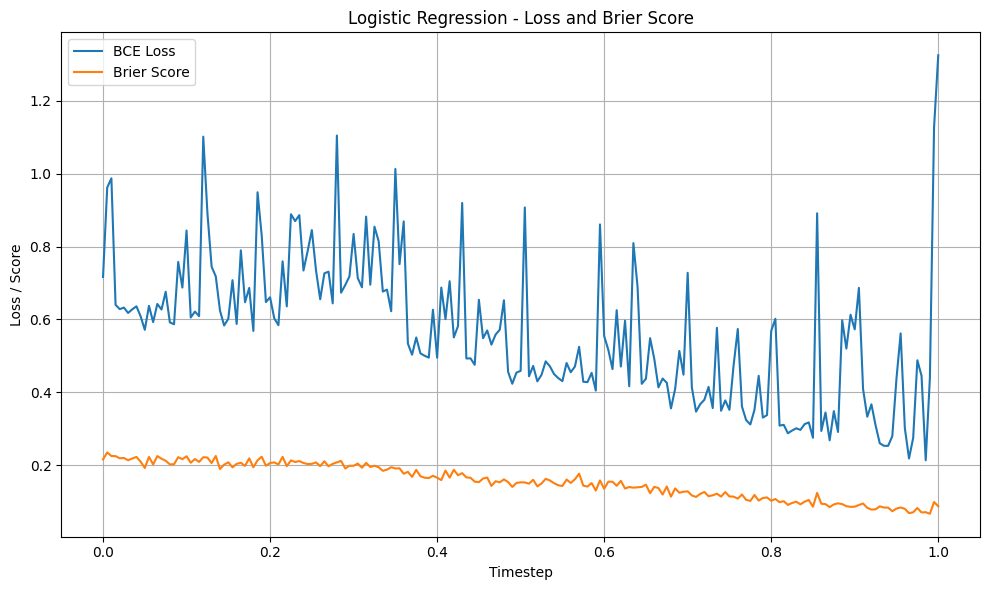

In [146]:
# # Test accuracy of model for each timestep on test data and plot
# accuracies = []
# timesteps = []
import process_data
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

x = process_data.plot_loss(models, test_data, "Logistic Regression")
# process_data.plot_accuracy(models, test_data, "Logistic Regression")

In [ ]:
# Save the model
import pickle
filename = 'logistic_regression_model.pickle'
pickle.dump(models, open(filename, 'wb'))

In [144]:
from process_data import write_predictions

write_predictions(models, interpolated_dir, [2024], 0, features, replace_nan_val = 0, phat_b = "LR_phat_b_model")

Loading data for 2024
Processed file:  game_401671629.csv
Processed file:  game_401671601.csv
Processed file:  game_401671826.csv
Processed file:  game_401671832.csv
Processed file:  game_401671749.csv
Processed file:  game_401671775.csv
Processed file:  game_401671761.csv
Processed file:  game_401671760.csv
Processed file:  game_401671774.csv
Processed file:  game_401671748.csv
Processed file:  game_401671833.csv
Processed file:  game_401671827.csv
Processed file:  game_401671600.csv
Processed file:  game_401671628.csv
Processed file:  game_401671616.csv
Processed file:  game_401671831.csv
Processed file:  game_401671825.csv
Processed file:  game_401671819.csv
Processed file:  game_401671762.csv
Processed file:  game_401671776.csv
Processed file:  game_401671789.csv
Processed file:  game_401671788.csv
Processed file:  game_401671777.csv
Processed file:  game_401671763.csv
Processed file:  game_401671818.csv
Processed file:  game_401671824.csv
Processed file:  game_401671830.csv
Proces

# For Debugging Purposes